In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# ============================================================================
# CELL 1: Check GPU and System Info
# ============================================================================
"""
Run this first to verify you have GPU access
"""
!nvidia-smi
!python --version

import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")
print(f"GPU Device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")


/bin/bash: line 1: nvidia-smi: command not found
Python 3.12.12
PyTorch version: 2.9.0+cu126
CUDA available: False
CUDA version: 12.6
GPU Device: No GPU


In [ ]:
# ============================================================================
# CELL 2: Install Dependencies
# ============================================================================
"""
Install all required libraries
This will take 3-5 minutes
"""
# Install PyTorch and torchvision (with CUDA support)
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install Detectron2
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# Install other dependencies
!pip install roboflow opencv-python matplotlib pycocotools

# Verify installations
import detectron2
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

print(f"✓ Detectron2 version: {detectron2.__version__}")
print("✓ All dependencies installed successfully!")


Looking in indexes: https://download.pytorch.org/whl/cu118
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-lslh62vz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-lslh62vz
  Resolved https://github.com/facebookresearch/detectron2.git to commit fd27788985af0f4ca800bca563acdb700bb890e2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.7 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp312-cp312-linux_x86_64.whl size=6706380 sha256=c9ab722562916fe438d82ab58e15824ecc1d21698bee0c4431b4d9ed0ca80a87
  Stored in directory: /tmp/pip-

In [ ]:
# ============================================================================
# CELL 3: Download Dataset from RoboFlow
# ============================================================================
"""
Replace with your actual RoboFlow API key and project details
Get your API key from: https://app.roboflow.com/settings/api
"""
from roboflow import Roboflow
import os

# ===== CONFIGURE THESE =====
ROBOFLOW_API_KEY = "McrhzGgUVuaQbO2a1BX6"  # Replace with your actual API key
WORKSPACE_NAME = "chandai"        # Replace with your workspace name
PROJECT_NAME = "lunar-scene-analysis-fejkh"           # Replace with your project name
VERSION_NUMBER = 5                      # Dataset version number
# ===========================

# Initialize Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(WORKSPACE_NAME).project(PROJECT_NAME)

# Download dataset in COCO format
print("Downloading dataset from RoboFlow...")
dataset = project.version(VERSION_NUMBER).download("coco")

# Get dataset location
dataset_location = dataset.location
print(f"✓ Dataset downloaded to: {dataset_location}")

# Verify dataset structure
print("\nDataset structure:")
for root, dirs, files in os.walk(dataset_location):
    level = root.replace(dataset_location, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show first 5 files
        print(f"{subindent}{file}")
    if len(files) > 5:
        print(f"{subindent}... and {len(files) - 5} more files")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Lunar-Scene-Analysis-5 in coco:: 100%|██████████| 1244/1244 [00:01<00:00, 1145.37it/s]

✓ Dataset downloaded to: /content/Lunar-Scene-Analysis-5

Dataset structure:
Lunar-Scene-Analysis-5/
  README.dataset.txt
  README.roboflow.txt
  test/
    PCAML-C-003_SCI_N_20140112131356_0007_A_2C_png.rf.6defd12f833e41890d01ab147510eab5.jpg
    PCAML-C-050_SCI_N_20140113195347_0008_A_2C_png.rf.372767574923e741a93ce418fe6cc835.jpg
    C3_TCAM_4_2C_003_png.rf.25a30345618aede7c7d6facd4a0d56ce.jpg
    PCAML-C-037_SCI_N_20140112135128_0007_A_2C_png.rf.90b685f59d585fd86e1d9790c6eb4309.jpg
    PCAML-C-026_SCI_N_20140112133751_0007_A_2C_png.rf.eb7d4f091f535a30a3fac3b38cd9982f.jpg
    ... and 44 more files
  valid/
    PCAML-Q-076_SCI_N_20131223010615_0005_A_2A_png.rf.278e85f7e7e4c40d2ebfd94693d5ccd9.jpg
    PCAML-C-006_SCI_N_20140112131703_0007_A_2C_png.rf.b7f636ed4f76be5bd56248bd75f20d14.jpg
    chang4_20190106043514_png.rf.0469fb627eb69787597a71ef2fe88bd1.jpg
    C3_TCAM_7_2A_061_png.rf.c093f960d781f1d8fd4f743a2b91a2f4.jpg
    chang4_20190111182548_png.rf.f5fad235e626fa04d02f12185f471a69.j

In [ ]:
# ============================================================================
# CELL 4: Register Dataset with Detectron2
# ============================================================================
"""
Register your COCO-format dataset with Detectron2
"""
from detectron2.data.datasets import register_coco_instances
import json

# Define paths
TRAIN_JSON = os.path.join(dataset_location, "train", "_annotations.coco.json")
TRAIN_IMG_DIR = os.path.join(dataset_location, "train")
VAL_JSON = os.path.join(dataset_location, "valid", "_annotations.coco.json")
VAL_IMG_DIR = os.path.join(dataset_location, "valid")
TEST_JSON = os.path.join(dataset_location, "test", "_annotations.coco.json")
TEST_IMG_DIR = os.path.join(dataset_location, "test")

# Verify files exist
print("Checking dataset files...")
assert os.path.exists(TRAIN_JSON), f"Train annotations not found at {TRAIN_JSON}"
assert os.path.exists(VAL_JSON), f"Valid annotations not found at {VAL_JSON}"
print("✓ All annotation files found")

# Register datasets
register_coco_instances("lunar_train", {}, TRAIN_JSON, TRAIN_IMG_DIR)
register_coco_instances("lunar_val", {}, VAL_JSON, VAL_IMG_DIR)
register_coco_instances("lunar_test", {}, TEST_JSON, TEST_IMG_DIR)

print("✓ Datasets registered successfully!")

# Get dataset info
print("\nDataset Information:")
print(f"Training set: {len(DatasetCatalog.get('lunar_train'))} images")
print(f"Validation set: {len(DatasetCatalog.get('lunar_val'))} images")
print(f"Test set: {len(DatasetCatalog.get('lunar_test'))} images")

# Get class names
metadata = MetadataCatalog.get("lunar_train")
class_names = metadata.thing_classes
num_classes = len(class_names)
print(f"\nNumber of classes: {num_classes}")
print(f"Classes: {class_names}")

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Checking dataset files...
✓ All annotation files found
✓ Datasets registered successfully!

Dataset Information:


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Training set: 1089 images
Validation set: 99 images
Test set: 48 images

Number of classes: 7
Classes: ['objects', 'artifact', 'boulder', 'crater', 'rock', 'rocky region', 'rover path']


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



Visualizing 3 random training samples:

Sample 1:
  - Image: PCAML-Q-034_SCI_N_20131223001859_0005_A_2A_png.rf.0b266bc66897a7441991d5e81e39fd2f.jpg
  - Annotations: 1 objects


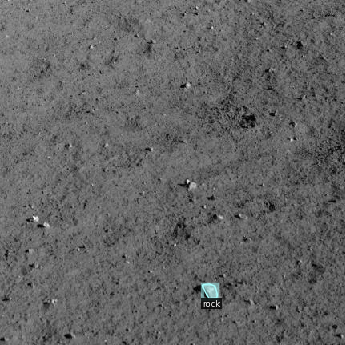


Sample 2:
  - Image: PCAML-C-053_SCI_N_20140113195655_0008_A_2C_png.rf.ae6ce97ba3a94448b1eb49414b2ce54a.jpg
  - Annotations: 2 objects


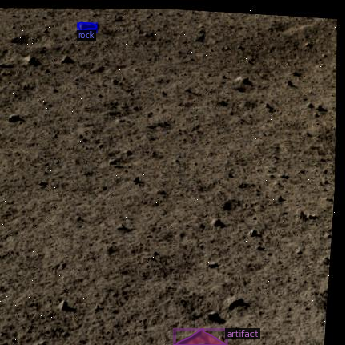


Sample 3:
  - Image: chang4_20190106034301_png.rf.50d9f0ac72e26afc4d59915c5661ad72.jpg
  - Annotations: 2 objects


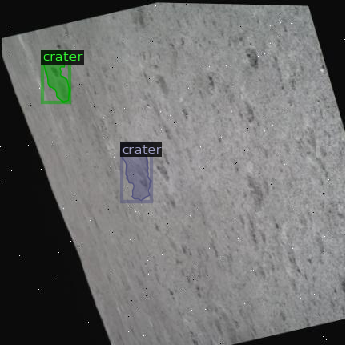

In [ ]:
# ============================================================================
# CELL 5: Visualize Sample Annotations
# ============================================================================
"""
Visualize a few training samples to verify data quality
"""
import random
import cv2
from detectron2.utils.visualizer import Visualizer
from google.colab.patches import cv2_imshow

# Get random samples from training set
dataset_dicts = DatasetCatalog.get("lunar_train")
samples = random.sample(dataset_dicts, min(3, len(dataset_dicts)))

print(f"Visualizing {len(samples)} random training samples:\n")

for idx, d in enumerate(samples):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.8)
    vis = visualizer.draw_dataset_dict(d)

    print(f"Sample {idx + 1}:")
    print(f"  - Image: {os.path.basename(d['file_name'])}")
    print(f"  - Annotations: {len(d['annotations'])} objects")
    cv2_imshow(vis.get_image()[:, :, ::-1])
    print()

In [ ]:
DRIVE_DIR = "/content/drive/MyDrive/output_maskrcnn_resnet50_v2"

In [ ]:
import os
from detectron2.config import get_cfg
from detectron2 import model_zoo

RESUME = False
def get_lunar_cfg():
    global RESUME # Declare intent to modify global RESUME
    cfg = get_cfg()

    # Load base Mask R-CNN ResNet-50 FPN config
    cfg.merge_from_file(
        model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    )

    # Path to checkpoint Detectron2 uses
    last_ckpt_file = os.path.join(DRIVE_DIR, "last_checkpoint")
    if os.path.exists(last_ckpt_file):
        print("Resuming training from last checkpoint!")
        cfg.MODEL.WEIGHTS = last_ckpt_file
        RESUME = True # Update global RESUME
    else:
        print("No checkpoint found! Starting fresh instead.")
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(
            "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"
        )
        RESUME = False # Update global RESUME


    # ===== DATASET =====
    cfg.DATASETS.TRAIN = ("lunar_train",)
    cfg.DATASETS.TEST = ("lunar_val",)

    # ===== DATALOADER =====
    cfg.DATALOADER.NUM_WORKERS = 2  # Optimal for Colab

    # ===== SOLVER (Training Parameters) =====
    cfg.SOLVER.IMS_PER_BATCH = 4  # Batch size (T4 GPU has 16GB, this is safe)
    cfg.SOLVER.BASE_LR = 0.00025  # Learning rate
    cfg.SOLVER.MAX_ITER = 25000
    cfg.SOLVER.STEPS = (2000, 2500)  # Learning rate decay steps
    cfg.SOLVER.GAMMA = 0.01        # LR decay factor (LR *= 0.1 at each step)
    cfg.SOLVER.WARMUP_ITERS = 500  # Warmup iterations
    cfg.SOLVER.WARMUP_FACTOR = 0.001
    cfg.SOLVER.CHECKPOINT_PERIOD = 1000

    # ===== MODEL =====
    cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128  # RoIs per image
    cfg.MODEL.ROI_HEADS.NUM_CLASSES = num_classes   # YOUR number of classes
    cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5     # Confidence threshold for inference

    # ===== INPUT =====
    # Multi-scale training
    cfg.INPUT.MIN_SIZE_TRAIN = (640, 672, 704, 736, 768, 800)
    cfg.INPUT.MAX_SIZE_TRAIN = 1333
    cfg.INPUT.MIN_SIZE_TEST = 800
    cfg.INPUT.MAX_SIZE_TEST = 1333

    # Data augmentation
    cfg.INPUT.RANDOM_FLIP = "horizontal"
    cfg.INPUT.BRIGHTNESS = 0.0
    cfg.INPUT.CONTRAST = 0.0
    cfg.INPUT.SATURATION = 0.0

    # ===== OUTPUT =====
    cfg.OUTPUT_DIR = DRIVE_DIR
    os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

    # ===== TEST/EVALUATION =====
    cfg.TEST.EVAL_PERIOD = 5000  # Evaluate every 500 iterations

    return cfg

# Create configuration
cfg = get_lunar_cfg()

# Print configuration summary
print("=" * 60)
print("TRAINING CONFIGURATION")
print("=" * 60)
print(f"Model: Mask R-CNN + ResNet-50-FPN")
print(f"Number of classes: {cfg.MODEL.ROI_HEADS.NUM_CLASSES}")
print(f"Classes: {class_names}")
print(f"\nTraining:")
print(f"  - Max iterations: {cfg.SOLVER.MAX_ITER}")
print(f"  - Batch size: {cfg.SOLVER.IMS_PER_BATCH}")
print(f"  - Base learning rate: {cfg.SOLVER.BASE_LR}")
print(f"  - LR decay steps: {cfg.SOLVER.STEPS}")
print(f"  - Checkpoint every: {cfg.SOLVER.CHECKPOINT_PERIOD} iters")
print(f"  - Evaluate every: {cfg.TEST.EVAL_PERIOD} iters")
print(f"\nOutput directory: {cfg.OUTPUT_DIR}")
print("=" * 60)

Resuming training from last checkpoint!
TRAINING CONFIGURATION
Model: Mask R-CNN + ResNet-50-FPN
Number of classes: 7
Classes: ['objects', 'artifact', 'boulder', 'crater', 'rock', 'rocky region', 'rover path']

Training:
  - Max iterations: 25000
  - Batch size: 4
  - Base learning rate: 0.00025
  - LR decay steps: (2000, 2500)
  - Checkpoint every: 1000 iters
  - Evaluate every: 5000 iters

Output directory: /content/drive/MyDrive/output_maskrcnn_resnet50_v2


In [ ]:
# ============================================================================
# CELL 7: Custom Data Mapper for RoboFlow Compatibility
# ============================================================================
"""
Custom data mapper to handle RoboFlow's RLE mask format
This fixes the polygon format error
"""
import copy
import torch
import numpy as np
from detectron2.data import detection_utils as utils
from detectron2.data import transforms as T
from pycocotools import mask as mask_util

class RoboFlowDataMapper:
    """
    Custom mapper that converts RLE masks to bitmap format for Detectron2
    """
    def __init__(self, cfg, is_train=True):
        self.is_train = is_train
        self.augmentations = self._build_augmentations(cfg, is_train)
        self.image_format = cfg.INPUT.FORMAT
        self.use_instance_mask = cfg.MODEL.MASK_ON
        self.instance_mask_format = "bitmask"  # Force bitmask format

    def _build_augmentations(self, cfg, is_train):
        """Build augmentation pipeline"""
        if is_train:
            min_size = cfg.INPUT.MIN_SIZE_TRAIN
            max_size = cfg.INPUT.MAX_SIZE_TRAIN
            sample_style = "choice"
        else:
            min_size = cfg.INPUT.MIN_SIZE_TEST
            max_size = cfg.INPUT.MAX_SIZE_TEST
            sample_style = "choice"

        augmentation = [T.ResizeShortestEdge(min_size, max_size, sample_style)]

        if is_train and cfg.INPUT.RANDOM_FLIP != "none":
            augmentation.append(
                T.RandomFlip(
                    horizontal=cfg.INPUT.RANDOM_FLIP == "horizontal",
                    vertical=cfg.INPUT.RANDOM_FLIP == "vertical",
                )
            )

        return augmentation

    def __call__(self, dataset_dict):
        """
        Args:
            dataset_dict (dict): Metadata of one image from the dataset
        Returns:
            dict: Processed format ready for the model
        """
        dataset_dict = copy.deepcopy(dataset_dict)

        # Read image
        image = utils.read_image(dataset_dict["file_name"], format=self.image_format)
        utils.check_image_size(dataset_dict, image)

        # Apply augmentations
        aug_input = T.AugInput(image)
        transforms = T.AugmentationList(self.augmentations)(aug_input)
        image = aug_input.image

        # Prepare image tensor
        image_shape = image.shape[:2]
        dataset_dict["image"] = torch.as_tensor(np.ascontiguousarray(image.transpose(2, 0, 1)))

        # Process annotations
        if "annotations" in dataset_dict:
            original_annotations = dataset_dict.pop("annotations")
            annos_for_transform = []

            for obj_raw in original_annotations:
                if obj_raw.get("iscrowd", 0) == 0: # Only process non-crowd annotations
                    obj_copy = copy.deepcopy(obj_raw)

                    # --- Step 1: Clean/Standardize polygon segmentation format if present
                    segm = obj_copy.get("segmentation")
                    if segm is None: # Handle cases where segmentation might be missing
                        obj_copy["segmentation"] = [] # Provide empty list to avoid errors
                    elif isinstance(segm, list): # It's a polygon list
                        processed_polygons = []
                        if segm:
                            # Normalize segm to always be a list of flat lists for consistent processing
                            if not isinstance(segm[0], list): # If it's a single flat list
                                segm = [segm] # Wrap it in another list

                            for poly_coords in segm:
                                if isinstance(poly_coords, list) and len(poly_coords) >= 6:
                                    cleaned_poly = []
                                    for coord in poly_coords:
                                        # Keep as float for transformation, filter non-finite
                                        if isinstance(coord, (int, float)) and np.isfinite(coord):
                                            cleaned_poly.append(float(coord))
                                    if len(cleaned_poly) >= 6:
                                        processed_polygons.append(cleaned_poly)
                        obj_copy["segmentation"] = processed_polygons # Update with cleaned polygons or empty list
                    # If segm is dict (RLE), leave as is.

                    annos_for_transform.append(obj_copy)

            # --- Step 2: Apply geometric transformations to annotations.
            # In Detectron2 v0.6, transform_instance_annotations does NOT take mask_format.
            # It transforms polygons to polygons and RLE to RLE.
            annos_processed = [
                utils.transform_instance_annotations(
                    annotation,
                    transforms,
                    image_shape
                )
                for annotation in annos_for_transform
            ]

            # Step 3: Convert to Instances object and filter empty ones.
            # Here, mask_format="bitmask" IS supported and converts transformed polygons/RLE to bitmasks.
            instances = utils.annotations_to_instances(
                annos_processed, image_shape, mask_format="bitmask"
            )
            dataset_dict["instances"] = utils.filter_empty_instances(instances)

        return dataset_dict

print("✓ Custom RoboFlow data mapper defined")

✓ Custom RoboFlow data mapper defined


In [ ]:
# ============================================================================
# CELL 7: Custom Trainer with Validation
# ============================================================================
"""
Custom trainer that includes validation during training
"""
from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader, build_detection_train_loader, get_detection_dataset_dicts
from torch.utils.data import DataLoader
import torch

class LunarTrainer(DefaultTrainer):
    """
    Custom trainer with periodic validation
    """
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inefrence")
        return COCOEvaluator(dataset_name, cfg, False, output_folder)

    @classmethod
    def build_train_loader(cls, cfg):
        # Explicitly use the custom RoboFlowDataMapper for training data
        # Use Detectron2's build_detection_train_loader with the custom mapper
        return build_detection_train_loader(cfg, mapper=RoboFlowDataMapper(cfg, is_train=True))

    @classmethod
    def test(cls, cfg, model, evaluators=None):
        """
        Evaluate the model on validation set
        """
        if evaluators is None:
            evaluators = [cls.build_evaluator(cfg, "lunar_val")]

        results = {}
        for evaluator in evaluators:
            # Explicitly use the custom RoboFlowDataMapper for test/validation data
            # Use Detectron2's build_detection_test_loader with the custom mapper
            data_loader = build_detection_test_loader(cfg, "lunar_val", mapper=RoboFlowDataMapper(cfg, is_train=False))
            results_i = inference_on_dataset(model, data_loader, evaluator)
            results.update(results_i)

        return results

print("✓ Custom trainer defined")

✓ Custom trainer defined


In [ ]:
import time

print("=" * 60)
print("STARTING TRAINING")
print("=" * 60)

# Create trainer
trainer = LunarTrainer(cfg)
trainer.resume_or_load(resume=RESUME) # Removed weights_only=False

# Training start time
start_time = time.time()

# Train the model
print("\nTraining in progress...")
print("Expected time: 1-3 hours (depends on MAX_ITER and dataset size)")
print("\nLoss values will be printed below:")
print("-" * 60)

try:
    trainer.train()
    training_time = time.time() - start_time
    print("-" * 60)
    print(f"✓ Training completed successfully!")
    print(f"Total training time: {training_time/3600:.2f} hours")
    print(f"Model saved to: {cfg.OUTPUT_DIR}")
except KeyboardInterrupt:
    print("\n⚠ Training interrupted by user")
    print(f"Partial model saved to: {cfg.OUTPUT_DIR}")
except Exception as e:
    print(f"\n✗ Training failed with error: {e}")
    raise

STARTING TRAINING
[12/08 12:20:43 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )


torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
W1208 12:20:57.956000 240 torch/fx/_symbolic_trace.py:52] is_fx_tracing will return true for both fx.symbolic_trace and torch.export. Please use is_fx_tracing_symbolic_tracing() for specifically fx.symbolic_trace or torch.compiler.is_compiling() for specifically torch.export/compile.


[12/08 12:21:11 d2.utils.events]:  eta: 0:43:18  iter: 21019  total_loss: 1.012  loss_cls: 0.2532  loss_box_reg: 0.4093  loss_mask: 0.2853  loss_rpn_cls: 0.03619  loss_rpn_loc: 0.02551    time: 0.6489  last_time: 0.7009  data_time: 0.0381  last_data_time: 0.0283   lr: 2.5e-08  max_mem: 3116M
[12/08 12:21:31 d2.utils.events]:  eta: 0:42:24  iter: 21039  total_loss: 1.102  loss_cls: 0.2972  loss_box_reg: 0.4433  loss_mask: 0.2996  loss_rpn_cls: 0.04253  loss_rpn_loc: 0.03722    time: 0.6506  last_time: 0.5975  data_time: 0.0310  last_data_time: 0.0317   lr: 2.5e-08  max_mem: 3116M
[12/08 12:21:44 d2.utils.events]:  eta: 0:44:22  iter: 21059  total_loss: 1.027  loss_cls: 0.2669  loss_box_reg: 0.3916  loss_mask: 0.2872  loss_rpn_cls: 0.04396  loss_rpn_loc: 0.03847    time: 0.6591  last_time: 0.5857  data_time: 0.0304  last_data_time: 0.0388   lr: 2.5e-08  max_mem: 3177M
[12/08 12:21:58 d2.utils.events]:  eta: 0:44:21  iter: 21079  total_loss: 0.985  loss_cls: 0.2289  loss_box_reg: 0.4138  

The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:206.)


[12/08 12:23:32 d2.utils.events]:  eta: 0:42:53  iter: 21219  total_loss: 0.9865  loss_cls: 0.2715  loss_box_reg: 0.3924  loss_mask: 0.3061  loss_rpn_cls: 0.03459  loss_rpn_loc: 0.03401    time: 0.6716  last_time: 0.6170  data_time: 0.0284  last_data_time: 0.0267   lr: 2.5e-08  max_mem: 3204M
[12/08 12:23:47 d2.utils.events]:  eta: 0:42:48  iter: 21239  total_loss: 1.027  loss_cls: 0.2355  loss_box_reg: 0.4127  loss_mask: 0.2837  loss_rpn_cls: 0.0346  loss_rpn_loc: 0.02819    time: 0.6753  last_time: 0.7328  data_time: 0.0287  last_data_time: 0.0250   lr: 2.5e-08  max_mem: 3204M
[12/08 12:24:01 d2.utils.events]:  eta: 0:42:47  iter: 21259  total_loss: 0.9788  loss_cls: 0.2692  loss_box_reg: 0.3934  loss_mask: 0.2783  loss_rpn_cls: 0.03001  loss_rpn_loc: 0.02359    time: 0.6783  last_time: 0.7436  data_time: 0.0291  last_data_time: 0.0254   lr: 2.5e-08  max_mem: 3204M
[12/08 12:24:15 d2.utils.events]:  eta: 0:42:20  iter: 21279  total_loss: 0.9649  loss_cls: 0.2369  loss_box_reg: 0.3958

The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /pytorch/torch/csrc/utils/tensor_numpy.cpp:206.)


[12/08 12:27:44 d2.utils.events]:  eta: 0:39:03  iter: 21579  total_loss: 1.044  loss_cls: 0.2546  loss_box_reg: 0.4049  loss_mask: 0.2945  loss_rpn_cls: 0.04485  loss_rpn_loc: 0.04934    time: 0.6879  last_time: 0.7449  data_time: 0.0292  last_data_time: 0.0289   lr: 2.5e-08  max_mem: 3209M
[12/08 12:27:58 d2.utils.events]:  eta: 0:38:47  iter: 21599  total_loss: 0.9648  loss_cls: 0.2447  loss_box_reg: 0.4028  loss_mask: 0.27  loss_rpn_cls: 0.03538  loss_rpn_loc: 0.02403    time: 0.6882  last_time: 0.5781  data_time: 0.0281  last_data_time: 0.0230   lr: 2.5e-08  max_mem: 3209M
[12/08 12:28:12 d2.utils.events]:  eta: 0:38:35  iter: 21619  total_loss: 1.038  loss_cls: 0.2558  loss_box_reg: 0.4203  loss_mask: 0.2831  loss_rpn_cls: 0.04432  loss_rpn_loc: 0.04436    time: 0.6884  last_time: 0.6632  data_time: 0.0273  last_data_time: 0.0265   lr: 2.5e-08  max_mem: 3209M
[12/08 12:28:26 d2.utils.events]:  eta: 0:38:25  iter: 21639  total_loss: 0.9637  loss_cls: 0.2299  loss_box_reg: 0.4132  

In [ ]:
# ============================================================================
# CELL 9: Evaluate Model on Validation Set
# ============================================================================
"""
Evaluate the trained model on validation set
"""
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

print("=" * 60)
print("EVALUATING MODEL ON VALIDATION SET")
print("=" * 60)

# Load the trained model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

# Create predictor
from detectron2.engine import DefaultPredictor
predictor = DefaultPredictor(cfg)

# Evaluate
evaluator = COCOEvaluator("lunar_val", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "lunar_val")
results = inference_on_dataset(predictor.model, val_loader, evaluator)

# Print results
print("\n" + "=" * 60)
print("EVALUATION RESULTS")
print("=" * 60)
for key, value in results.items():
    if isinstance(value, dict):
        print(f"\n{key}:")
        for k, v in value.items():
            print(f"  {k}: {v:.4f}" if isinstance(v, float) else f"  {k}: {v}")
    else:
        print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")
print("=" * 60)

EVALUATING MODEL ON VALIDATION SET


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

WARNING [12/08 05:41:21 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[12/08 05:41:21 d2.data.datasets.coco]: Loaded 99 images in COCO format from /content/Lunar-Scene-Analysis-5/valid/_annotations.coco.json
VISUALIZING PREDICTIONS ON VALIDATION SET

Sample 1: chang4_20190106044645_png.rf.32f24bbaa36e577212513481c48a0bb9.jpg
Ground truth objects: 2
Predicted objects: 11


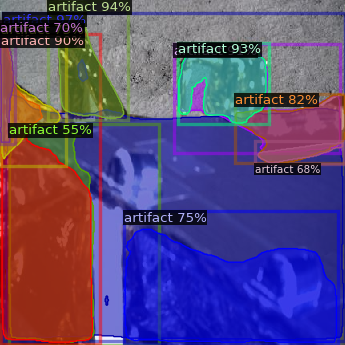


Sample 2: chang4_20190111192504_png.rf.17f8c39c6a2a8d3c30d55a025d8be71e.jpg
Ground truth objects: 2
Predicted objects: 5


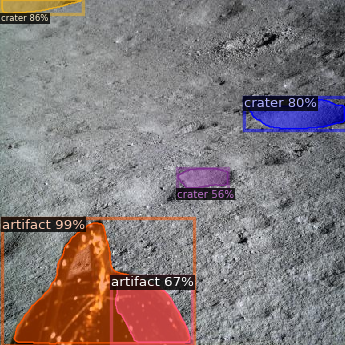


Sample 3: C3_TCAM_4_2C_236_png.rf.52c84c4fb09442c451a40d8fc293a7aa.jpg
Ground truth objects: 14
Predicted objects: 27


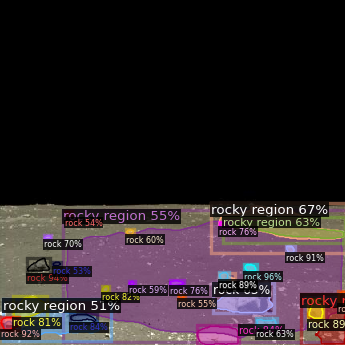


Sample 4: PCAML-C-004_SCI_N_20140113190347_0008_A_2C_png.rf.9a0992bfc5e8266bbb917e0978c4a452.jpg
Ground truth objects: 1
Predicted objects: 6


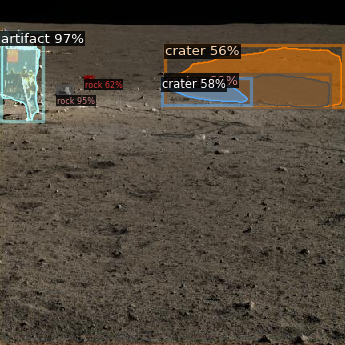


Sample 5: PCAML-Q-011_SCI_N_20131222235819_0005_A_2A_png.rf.c778ea39d4b6e001c6eb11f38002ac3d.jpg
Ground truth objects: 2
Predicted objects: 7


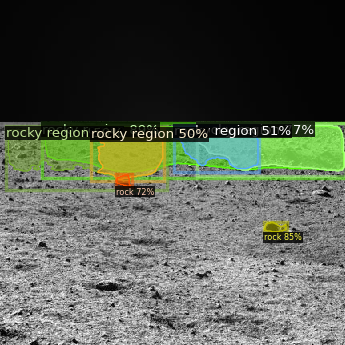

In [ ]:
# ============================================================================
# CELL 10: Visualize Predictions on Validation Set
# ============================================================================
"""
Visualize model predictions on random validation images
"""
import random
from google.colab.patches import cv2_imshow

# Get random validation samples
val_dataset_dicts = DatasetCatalog.get("lunar_val")
samples = random.sample(val_dataset_dicts, min(5, len(val_dataset_dicts)))

print("=" * 60)
print("VISUALIZING PREDICTIONS ON VALIDATION SET")
print("=" * 60)

for idx, d in enumerate(samples):
    img = cv2.imread(d["file_name"])

    # Make prediction
    outputs = predictor(img)

    # Visualize
    v = Visualizer(
        img[:, :, ::-1],
        metadata=metadata,
        scale=0.8
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    print(f"\nSample {idx + 1}: {os.path.basename(d['file_name'])}")
    print(f"Ground truth objects: {len(d['annotations'])}")
    print(f"Predicted objects: {len(outputs['instances'])}")

    # Show prediction
    cv2_imshow(out.get_image()[:, :, ::-1])

INFERENCE ON TEST SET
Found 48 test images

Image: PCAML-C-016_SCI_N_20140113191616_0008_A_2C_png.rf.47c2a490e59c529d925c4188289dff84.jpg
Detected objects: 20
Classes detected: [4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 4, 5, 4, 4, 5, 4]
Confidence scores: [0.9639502167701721, 0.9527769088745117, 0.9044874906539917, 0.8997305631637573, 0.899265468120575, 0.8704995512962341, 0.8658941984176636, 0.8513407111167908, 0.8449908494949341, 0.8265531063079834, 0.7671145796775818, 0.7623364329338074, 0.7503631114959717, 0.7283647656440735, 0.6233851909637451, 0.6123379468917847, 0.6098419427871704, 0.6085980534553528, 0.5057428479194641, 0.5023688077926636]


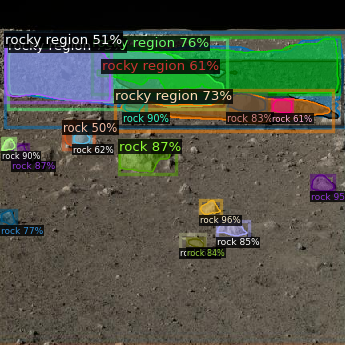


Image: PCAML-C-023_SCI_N_20140113192333_0008_A_2C_png.rf.870599ab03a765d4f9fff5750b537658.jpg
Detected objects: 14
Classes detected: [4, 3, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5, 4, 5]
Confidence scores: [0.9665823578834534, 0.8297953605651855, 0.7947811484336853, 0.7552220225334167, 0.6903749704360962, 0.6832947731018066, 0.6710435748100281, 0.6233838200569153, 0.6122415661811829, 0.5919557809829712, 0.550288200378418, 0.5324580073356628, 0.5312224626541138, 0.5214262008666992]


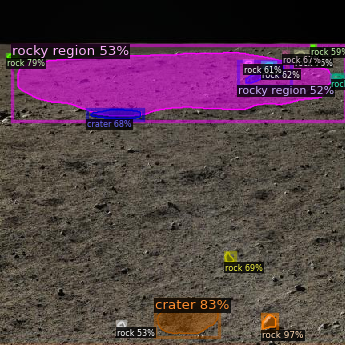


Image: PCAML-C-026_SCI_N_20140112133751_0007_A_2C_png.rf.eb7d4f091f535a30a3fac3b38cd9982f.jpg
Detected objects: 9
Classes detected: [4, 4, 3, 4, 4, 4, 4, 3, 4]
Confidence scores: [0.9536854028701782, 0.85542893409729, 0.8253799676895142, 0.812289834022522, 0.7847697734832764, 0.7414124608039856, 0.5778506398200989, 0.5493456721305847, 0.5145280957221985]


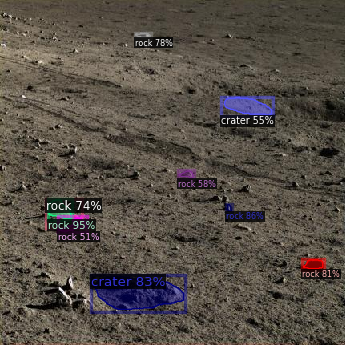

In [ ]:
# ============================================================================
# CELL 11: Inference on New Images
# ============================================================================
"""
Run inference on test set or new images
"""
import glob

print("=" * 60)
print("INFERENCE ON TEST SET")
print("=" * 60)

# Get test images
test_images = glob.glob(os.path.join(TEST_IMG_DIR, "*.jpg")) + \
              glob.glob(os.path.join(TEST_IMG_DIR, "*.png"))

print(f"Found {len(test_images)} test images")

# Run inference on first 3 test images
for img_path in test_images[:3]:
    img = cv2.imread(img_path)

    # Predict
    outputs = predictor(img)
    instances = outputs["instances"].to("cpu")

    # Visualize
    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=0.8)
    out = v.draw_instance_predictions(instances)

    print(f"\nImage: {os.path.basename(img_path)}")
    print(f"Detected objects: {len(instances)}")
    print(f"Classes detected: {instances.pred_classes.tolist()}")
    print(f"Confidence scores: {instances.scores.tolist()}")

    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
# ============================================================================
# CELL 12: Extract Features for LLM Integration
# ============================================================================
"""
Extract feature vectors from the model for LLM integration
"""
import torch
import numpy as np

def extract_features_for_llm(image_path, predictor, cfg):
    """
    Extract rich features from Mask R-CNN for LLM processing

    Returns:
        dict: Contains global features, per-instance features, and metadata
    """
    # Read image
    img = cv2.imread(image_path)
    height, width = img.shape[:2]

    # Get model predictions
    with torch.no_grad():
        # Preprocess
        inputs = predictor.model.preprocess_image([{"image": torch.as_tensor(img.transpose(2, 0, 1))}])
        images = predictor.model.preprocess_image([{"image": torch.as_tensor(img.transpose(2, 0, 1))}])

        # Extract features from backbone
        features = predictor.model.backbone(images[0].tensor)

        # Run inference
        outputs = predictor(img)
        instances = outputs["instances"].to("cpu")

    # Extract global features (from FPN P5 level - highest semantic level)
    global_features = features['p5'].mean(dim=[2, 3]).squeeze().cpu().numpy()  # Shape: (256,)

    # Prepare per-instance information
    instances_info = []
    if len(instances) > 0:
        boxes = instances.pred_boxes.tensor.numpy()
        scores = instances.scores.numpy()
        classes = instances.pred_classes.numpy()
        masks = instances.pred_masks.numpy()

        for i in range(len(instances)):
            instance_dict = {
                "class_id": int(classes[i]),
                "class_name": metadata.thing_classes[classes[i]],
                "confidence": float(scores[i]),
                "bbox": boxes[i].tolist(),  # [x1, y1, x2, y2]
                "mask_area": int(masks[i].sum()),
                "bbox_area": int((boxes[i][2] - boxes[i][0]) * (boxes[i][3] - boxes[i][1])),
                "centroid": [
                    float((boxes[i][0] + boxes[i][2]) / 2 / width),   # Normalized x
                    float((boxes[i][1] + boxes[i][3]) / 2 / height)   # Normalized y
                ]
            }
            instances_info.append(instance_dict)

    # Compute scene statistics
    class_counts = {}
    for class_id in range(len(metadata.thing_classes)):
        count = (instances.pred_classes == class_id).sum().item() if len(instances) > 0 else 0
        if count > 0:
            class_counts[metadata.thing_classes[class_id]] = count

    # Prepare final feature dictionary for LLM
    llm_features = {
        "image_path": image_path,
        "image_size": {"width": width, "height": height},
        "global_features": global_features.tolist(),  # 256-dim backbone features
        "global_feature_dim": len(global_features),
        "total_objects_detected": len(instances),
        "class_distribution": class_counts,
        "instances": instances_info,
        "scene_description": f"Detected {len(instances)} objects: {class_counts}"
    }

    return llm_features

# Example: Extract features from a test image
if len(test_images) > 0:
    print("=" * 60)
    print("EXTRACTING FEATURES FOR LLM")
    print("=" * 60)

    sample_image = test_images[0]
    features = extract_features_for_llm(sample_image, predictor, cfg)

    print(f"\nImage: {os.path.basename(sample_image)}")
    print(f"Global feature dimension: {features['global_feature_dim']}")
    print(f"Total objects detected: {features['total_objects_detected']}")
    print(f"Class distribution: {features['class_distribution']}")
    print(f"\nFirst 10 global features: {features['global_features'][:10]}")

    print("\nPer-instance information:")
    for i, inst in enumerate(features['instances'][:3]):  # Show first 3
        print(f"  Instance {i+1}:")
        print(f"    Class: {inst['class_name']}")
        print(f"    Confidence: {inst['confidence']:.3f}")
        print(f"    Centroid: ({inst['centroid'][0]:.3f}, {inst['centroid'][1]:.3f})")
        print(f"    Area: {inst['mask_area']} pixels")

EXTRACTING FEATURES FOR LLM


AttributeError: 'Tensor' object has no attribute 'tensor'

In [ ]:
# ============================================================================
# CELL 13: Extract Polygon Points from Segmentation Masks
# ============================================================================
"""
Convert segmentation masks to polygon coordinates for each detected object
"""
import cv2
import numpy as np
from pycocotools import mask as mask_util

def extract_polygons_from_mask(mask):
    """
    Convert binary mask to polygon coordinates

    Args:
        mask: Binary mask (numpy array)

    Returns:
        List of polygons, each polygon is a list of [x, y] coordinates
    """
    # Find contours
    contours, _ = cv2.findContours(
        mask.astype(np.uint8),
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE
    )

    polygons = []
    for contour in contours:
        # Simplify contour to reduce points (optional)
        epsilon = 0.002 * cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, epsilon, True)

        # Convert to list of [x, y] coordinates
        if len(approx) >= 3:  # Valid polygon needs at least 3 points
            polygon = approx.reshape(-1, 2).tolist()
            polygons.append(polygon)

    return polygons

def get_detection_results_with_polygons(image_path, predictor, metadata):
    """
    Run inference and extract classes, confidence scores, bboxes, and polygon points

    Returns:
        dict: Complete detection results with polygon coordinates
    """
    # Read image
    img = cv2.imread(image_path)
    height, width = img.shape[:2]

    # Run inference
    outputs = predictor(img)
    instances = outputs["instances"].to("cpu")

    # Prepare results
    results = {
        "image_path": image_path,
        "image_size": {"width": width, "height": height},
        "num_detections": len(instances),
        "detections": []
    }

    if len(instances) > 0:
        # Extract all predictions
        boxes = instances.pred_boxes.tensor.numpy()
        scores = instances.scores.numpy()
        classes = instances.pred_classes.numpy()
        masks = instances.pred_masks.numpy()

        # Process each detection
        for i in range(len(instances)):
            # Extract polygon points from mask
            polygons = extract_polygons_from_mask(masks[i])

            detection = {
                "detection_id": i,
                "class_id": int(classes[i]),
                "class_name": metadata.thing_classes[classes[i]],
                "confidence": float(scores[i]),
                "bbox": {
                    "x1": float(boxes[i][0]),
                    "y1": float(boxes[i][1]),
                    "x2": float(boxes[i][2]),
                    "y2": float(boxes[i][3]),
                    "width": float(boxes[i][2] - boxes[i][0]),
                    "height": float(boxes[i][3] - boxes[i][1])
                },
                "segmentation": {
                    "polygons": polygons,  # List of polygons (each polygon is list of [x,y] points)
                    "num_polygons": len(polygons),
                    "mask_area_pixels": int(masks[i].sum())
                },
                "centroid": {
                    "x": float((boxes[i][0] + boxes[i][2]) / 2),
                    "y": float((boxes[i][1] + boxes[i][3]) / 2),
                    "x_normalized": float((boxes[i][0] + boxes[i][2]) / 2 / width),
                    "y_normalized": float((boxes[i][1] + boxes[i][3]) / 2 / height)
                }
            }

            results["detections"].append(detection)

    return results

# Example: Extract polygons from test images
print("=" * 60)
print("EXTRACTING CLASSES AND POLYGON POINTS")
print("=" * 60)

if len(test_images) > 0:
    sample_image = test_images[0]
    detection_results = get_detection_results_with_polygons(sample_image, predictor, metadata)

    print(f"\nImage: {os.path.basename(sample_image)}")
    print(f"Image size: {detection_results['image_size']}")
    print(f"Total detections: {detection_results['num_detections']}")

    print("\n" + "-" * 60)
    print("DETAILED DETECTION RESULTS:")
    print("-" * 60)

    for det in detection_results["detections"][:3]:  # Show first 3 detections
        print(f"\nDetection #{det['detection_id']}:")
        print(f"  Class: {det['class_name']} (ID: {det['class_id']})")
        print(f"  Confidence: {det['confidence']:.3f}")
        print(f"  Bounding Box: ({det['bbox']['x1']:.1f}, {det['bbox']['y1']:.1f}, "
              f"{det['bbox']['x2']:.1f}, {det['bbox']['y2']:.1f})")
        print(f"  Centroid: ({det['centroid']['x']:.1f}, {det['centroid']['y']:.1f})")
        print(f"  Mask Area: {det['segmentation']['mask_area_pixels']} pixels")
        print(f"  Number of Polygons: {det['segmentation']['num_polygons']}")

        # Show first polygon points (first 5 points)
        if len(det['segmentation']['polygons']) > 0:
            first_polygon = det['segmentation']['polygons'][0]
            print(f"  Polygon Points (first 5): {first_polygon[:5]}")
            print(f"  Total Points in Polygon: {len(first_polygon)}")

    if detection_results['num_detections'] > 3:
        print(f"\n... and {detection_results['num_detections'] - 3} more detections")

    # Save to JSON file
    output_json_path = os.path.join(cfg.OUTPUT_DIR, "sample_detection_with_polygons.json")
    with open(output_json_path, "w") as f:
        json.dump(detection_results, f, indent=2)
    print(f"\n✓ Full results saved to: {output_json_path}")

EXTRACTING CLASSES AND POLYGON POINTS

Image: PCAML-C-016_SCI_N_20140113191616_0008_A_2C_png.rf.47c2a490e59c529d925c4188289dff84.jpg
Image size: {'width': 432, 'height': 432}
Total detections: 20

------------------------------------------------------------
DETAILED DETECTION RESULTS:
------------------------------------------------------------

Detection #0:
  Class: rock (ID: 4)
  Confidence: 0.964
  Bounding Box: (250.0, 251.0, 276.4, 270.3)
  Centroid: (263.2, 260.7)
  Mask Area: 300 pixels
  Number of Polygons: 1
  Polygon Points (first 5): [[275, 263], [274, 263], [272, 261], [272, 260], [271, 259]]
  Total Points in Polygon: 41

Detection #1:
  Class: rock (ID: 4)
  Confidence: 0.953
  Bounding Box: (388.8, 219.1, 417.8, 240.8)
  Centroid: (403.3, 230.0)
  Mask Area: 446 pixels
  Number of Polygons: 1
  Polygon Points (first 5): [[390, 227], [390, 231], [389, 232], [389, 235], [391, 237]]
  Total Points in Polygon: 29

Detection #2:
  Class: rock (ID: 4)
  Confidence: 0.904
  Bo

In [ ]:
# ============================================================================
# CELL 14: Batch Process All Images and Export Polygon Data
# ============================================================================
"""
Process all test images and export results with polygon coordinates
"""
import json
from tqdm import tqdm

def process_all_images(image_paths, predictor, metadata, output_dir):
    """
    Process all images and save results with polygon coordinates
    """
    all_results = []

    print(f"\nProcessing {len(image_paths)} images...")

    for img_path in tqdm(image_paths):
        try:
            results = get_detection_results_with_polygons(img_path, predictor, metadata)
            all_results.append(results)
        except Exception as e:
            print(f"Error processing {img_path}: {e}")
            continue

    return all_results

# Process all test images
print("=" * 60)
print("BATCH PROCESSING TEST SET")
print("=" * 60)

all_test_results = process_all_images(test_images, predictor, metadata, cfg.OUTPUT_DIR)

# Save all results to JSON
all_results_path = os.path.join(cfg.OUTPUT_DIR, "all_detections_with_polygons.json")
with open(all_results_path, "w") as f:
    json.dump(all_test_results, f, indent=2)

print(f"\n✓ All detection results saved to: {all_results_path}")

# Create summary statistics
total_detections = sum(r['num_detections'] for r in all_test_results)
class_distribution = {}
for result in all_test_results:
    for det in result['detections']:
        class_name = det['class_name']
        class_distribution[class_name] = class_distribution.get(class_name, 0) + 1

print("\n" + "=" * 60)
print("DETECTION SUMMARY")
print("=" * 60)
print(f"Total images processed: {len(all_test_results)}")
print(f"Total objects detected: {total_detections}")
print(f"Average objects per image: {total_detections/len(all_test_results):.2f}")
print(f"\nClass Distribution:")
for class_name, count in sorted(class_distribution.items(), key=lambda x: x[1], reverse=True):
    print(f"  {class_name}: {count}")

BATCH PROCESSING TEST SET

Processing 48 images...


100%|██████████| 48/48 [00:04<00:00,  9.84it/s]



✓ All detection results saved to: ./output_maskrcnn_resnet50/all_detections_with_polygons.json

DETECTION SUMMARY
Total images processed: 48
Total objects detected: 439
Average objects per image: 9.15

Class Distribution:
  rock: 244
  crater: 65
  rocky region: 57
  artifact: 49
  rover path: 24


In [ ]:
# ============================================================================
# CELL 15: Export to COCO Format with Polygon Annotations
# ============================================================================
"""
Export predictions to COCO format for easy integration with other tools
"""
import datetime

def export_to_coco_format(results_list, output_path, metadata):
    """
    Convert detection results to COCO format JSON
    """
    coco_output = {
        "info": {
            "description": "Lunar Surface Segmentation Results",
            "date_created": datetime.datetime.now().isoformat(),
            "model": "Mask R-CNN ResNet-50-FPN"
        },
        "images": [],
        "annotations": [],
        "categories": []
    }

    # Add categories
    for idx, class_name in enumerate(metadata.thing_classes):
        coco_output["categories"].append({
            "id": idx,
            "name": class_name,
            "supercategory": "lunar_object"
        })

    # Add images and annotations
    annotation_id = 1
    for img_idx, result in enumerate(results_list):
        image_id = img_idx + 1

        # Add image info
        coco_output["images"].append({
            "id": image_id,
            "file_name": os.path.basename(result["image_path"]),
            "width": result["image_size"]["width"],
            "height": result["image_size"]["height"]
        })

        # Add annotations
        for det in result["detections"]:
            # Convert polygons to COCO format (flat list)
            segmentation = []
            for polygon in det["segmentation"]["polygons"]:
                flat_polygon = [coord for point in polygon for coord in point]
                segmentation.append(flat_polygon)

            # Calculate bbox in COCO format [x, y, width, height]
            bbox = [
                det["bbox"]["x1"],
                det["bbox"]["y1"],
                det["bbox"]["width"],
                det["bbox"]["height"]
            ]

            annotation = {
                "id": annotation_id,
                "image_id": image_id,
                "category_id": det["class_id"],
                "segmentation": segmentation,
                "area": det["segmentation"]["mask_area_pixels"],
                "bbox": bbox,
                "iscrowd": 0,
                "score": det["confidence"]
            }

            coco_output["annotations"].append(annotation)
            annotation_id += 1

    # Save to file
    with open(output_path, "w") as f:
        json.dump(coco_output, f, indent=2)

    return coco_output

# Export to COCO format
coco_output_path = os.path.join(cfg.OUTPUT_DIR, "predictions_coco_format.json")
coco_results = export_to_coco_format(all_test_results, coco_output_path, metadata)

print("=" * 60)
print("EXPORTED TO COCO FORMAT")
print("=" * 60)
print(f"✓ COCO format predictions saved to: {coco_output_path}")
print(f"  - Images: {len(coco_results['images'])}")
print(f"  - Annotations: {len(coco_results['annotations'])}")
print(f"  - Categories: {len(coco_results['categories'])}")

EXPORTED TO COCO FORMAT
✓ COCO format predictions saved to: ./output_maskrcnn_resnet50/predictions_coco_format.json
  - Images: 48
  - Annotations: 439
  - Categories: 7


VISUALIZING POLYGON OVERLAYS

Image 1: PCAML-C-016_SCI_N_20140113191616_0008_A_2C_png.rf.47c2a490e59c529d925c4188289dff84.jpg
  Detections: 20


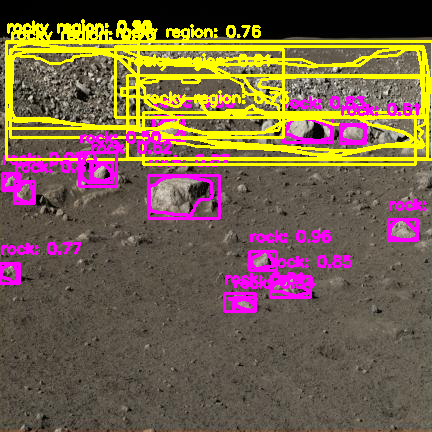


Image 2: PCAML-C-023_SCI_N_20140113192333_0008_A_2C_png.rf.870599ab03a765d4f9fff5750b537658.jpg
  Detections: 14


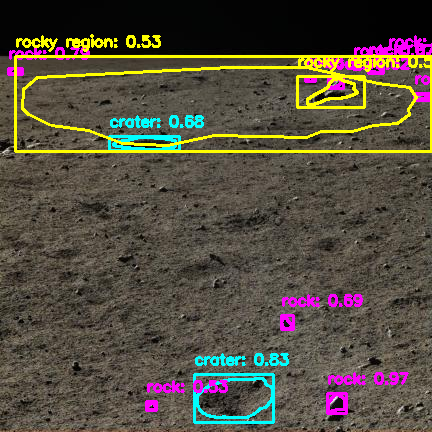


Image 3: PCAML-C-026_SCI_N_20140112133751_0007_A_2C_png.rf.eb7d4f091f535a30a3fac3b38cd9982f.jpg
  Detections: 9


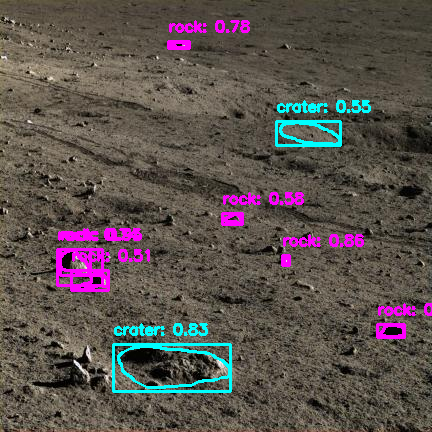

In [ ]:
# ============================================================================
# CELL 16: Visualize Polygon Overlays
# ============================================================================
"""
Visualize detected polygons on images
"""
def visualize_polygons(image_path, detection_results, save_path=None):
    """
    Draw polygon boundaries on image
    """
    img = cv2.imread(image_path)

    # Define colors for each class
    colors = [
        (255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0),
        (255, 0, 255), (0, 255, 255), (128, 0, 0)
    ]

    for det in detection_results["detections"]:
        class_id = det["class_id"]
        class_name = det["class_name"]
        confidence = det["confidence"]
        color = colors[class_id % len(colors)]

        # Draw all polygons for this detection
        for polygon in det["segmentation"]["polygons"]:
            pts = np.array(polygon, dtype=np.int32)
            cv2.polylines(img, [pts], True, color, 2)

        # Draw bounding box
        x1, y1 = int(det["bbox"]["x1"]), int(det["bbox"]["y1"])
        x2, y2 = int(det["bbox"]["x2"]), int(det["bbox"]["y2"])
        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

        # Add label
        label = f"{class_name}: {confidence:.2f}"
        cv2.putText(img, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, color, 2)

    if save_path:
        cv2.imwrite(save_path, img)

    return img

# Visualize samples with polygons
print("=" * 60)
print("VISUALIZING POLYGON OVERLAYS")
print("=" * 60)

for idx, result in enumerate(all_test_results[:3]):  # First 3 images
    img_path = result["image_path"]
    vis_img = visualize_polygons(img_path, result)

    print(f"\nImage {idx+1}: {os.path.basename(img_path)}")
    print(f"  Detections: {result['num_detections']}")
    cv2_imshow(vis_img)

In [ ]:
# ============================================================================
# CELL 17: Save Model and Export Results
# ============================================================================
"""
Save the trained model and export results for future use
"""
import json
import pickle

print("=" * 60)
print("SAVING MODEL AND RESULTS")
print("=" * 60)

# Model is already saved during training at model_final.pth

# Save configuration
config_save_path = os.path.join(cfg.OUTPUT_DIR, "config.yaml")
with open(config_save_path, "w") as f:
    f.write(cfg.dump())
print(f"✓ Configuration saved to: {config_save_path}")

# Save class names
class_names_path = os.path.join(cfg.OUTPUT_DIR, "class_names.json")
with open(class_names_path, "w") as f:
    json.dump({"classes": class_names, "num_classes": num_classes}, f, indent=2)
print(f"✓ Class names saved to: {class_names_path}")

# Save evaluation results
results_path = os.path.join(cfg.OUTPUT_DIR, "evaluation_results.json")
with open(results_path, "w") as f:
    # Convert any non-serializable objects
    serializable_results = {}
    for k, v in results.items():
        if isinstance(v, dict):
            serializable_results[k] = {kk: float(vv) if isinstance(vv, (np.floating, float)) else vv
                                       for kk, vv in v.items()}
        else:
            serializable_results[k] = float(v) if isinstance(v, (np.floating, float)) else v
    json.dump(serializable_results, f, indent=2)
print(f"✓ Evaluation results saved to: {results_path}")

print(f"\n✓ All files saved to: {cfg.OUTPUT_DIR}")
print("\nSaved files:")
print(f"  - model_final.pth (trained model weights)")
print(f"  - config.yaml (model configuration)")
print(f"  - class_names.json (class mapping)")
print(f"  - evaluation_results.json (validation metrics)")

SAVING MODEL AND RESULTS
✓ Configuration saved to: ./output_maskrcnn_resnet50/config.yaml
✓ Class names saved to: ./output_maskrcnn_resnet50/class_names.json
✓ Evaluation results saved to: ./output_maskrcnn_resnet50/evaluation_results.json

✓ All files saved to: ./output_maskrcnn_resnet50

Saved files:
  - model_final.pth (trained model weights)
  - config.yaml (model configuration)
  - class_names.json (class mapping)
  - evaluation_results.json (validation metrics)


In [ ]:
# ============================================================================
# CELL 14: Download Results (Optional)
# ============================================================================
"""
Download trained model and results to your local machine
"""
from google.colab import files
import shutil

# Create a zip file of all outputs
print("Creating zip file of results...")
shutil.make_archive(
    "/content/lunar_maskrcnn_resnet50_results",
    'zip',
    cfg.OUTPUT_DIR
)

print("✓ Results packaged!")
print("\nTo download, run the following command:")
print("files.download('/content/lunar_maskrcnn_resnet50_results.zip')")

# Uncomment to auto-download (may take time for large files)
# files.download('/content/lunar_maskrcnn_resnet50_results.zip')

Creating zip file of results...
✓ Results packaged!

To download, run the following command:
files.download('/content/lunar_maskrcnn_resnet50_results.zip')


In [ ]:
files.download('/content/lunar_maskrcnn_resnet50_results.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ============================================================================
# CELL 15: Training Summary and Next Steps
# ============================================================================
"""
Summary of training and recommendations for next steps
"""
print("=" * 70)
print(" " * 20 + "TRAINING COMPLETE!")
print("=" * 70)

print("\n📊 PERFORMANCE SUMMARY:")
print("-" * 70)
if 'bbox' in results:
    print(f"  Bounding Box mAP@0.5: {results['bbox']['AP']:.2f}%")
    print(f"  Bounding Box mAP@0.75: {results['bbox']['AP75']:.2f}%")
if 'segm' in results:
    print(f"  Segmentation mAP@0.5: {results['segm']['AP']:.2f}%")
    print(f"  Segmentation mAP@0.75: {results['segm']['AP75']:.2f}%")

print("\n📁 OUTPUT FILES:")
print("-" * 70)
print(f"  Model weights: {os.path.join(cfg.OUTPUT_DIR, 'model_final.pth')}")
print(f"  Configuration: {os.path.join(cfg.OUTPUT_DIR, 'config.yaml')}")
print(f"  Results: {os.path.join(cfg.OUTPUT_DIR, 'evaluation_results.json')}")

print("\n🚀 NEXT STEPS:")
print("-" * 70)
print("  1. Review evaluation metrics above")
print("  2. If mAP < 70%, consider:")
print("     - Training for more iterations (increase MAX_ITER)")
print("     - Adjusting learning rate")
print("     - Adding more training data")
print("     - Checking annotation quality")
print("  3. If mAP ≥ 70%, proceed to train better models:")
print("     - Mask R-CNN + ResNeXt-101-FPN")
print("     - Mask R-CNN + Swin-T-FPN")
print("     - YOLOv8-Seg")
print("  4. Integrate features with LLM for report generation")
print("  5. Move to Phase 2: Soil composition estimation")

print("\n💡 TIPS:")
print("-" * 70)
print("  - Save this notebook for future reference")
print("  - Document your results in your FYP report")
print("  - Compare this baseline with future models")
print("  - Test on edge cases (shadows, glare, small objects)")

print("\n" + "=" * 70)
print("Happy Training! 🌙🚀")
print("=" * 70)

                    TRAINING COMPLETE!

📊 PERFORMANCE SUMMARY:
----------------------------------------------------------------------
  Bounding Box mAP@0.5: 21.86%
  Bounding Box mAP@0.75: 19.87%
  Segmentation mAP@0.5: 19.87%
  Segmentation mAP@0.75: 18.79%

📁 OUTPUT FILES:
----------------------------------------------------------------------
  Model weights: ./output_maskrcnn_resnet50/model_final.pth
  Configuration: ./output_maskrcnn_resnet50/config.yaml
  Results: ./output_maskrcnn_resnet50/evaluation_results.json

🚀 NEXT STEPS:
----------------------------------------------------------------------
  1. Review evaluation metrics above
  2. If mAP < 70%, consider:
     - Training for more iterations (increase MAX_ITER)
     - Adjusting learning rate
     - Adding more training data
     - Checking annotation quality
  3. If mAP ≥ 70%, proceed to train better models:
     - Mask R-CNN + ResNeXt-101-FPN
     - Mask R-CNN + Swin-T-FPN
     - YOLOv8-Seg
  4. Integrate features with LL